# Regression Analysis of Prevention Services in Uganda by Subcounty Level, October-December 2024

In [124]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [125]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [126]:
import pandas as pd

In [127]:
df = pd.read_csv('uganda_pp_with_pop.csv')

In [128]:
df.head()

,Region,District,Subcounty,Service outlet,Tracker HF ID,KP Tracker /HIBRID Mechanism name,DATIM ID,DATIM Subcounty ID,DATIM Subcounty Name,DHIS2 ID,DHIS2 District,DHIS2 Subcounty,DHIS2 HF Name,COP Mechanism name,COP Mechanism ID,COP US Agency,Period,HIV_Prev_Numerator: \nOverall Total,"HIV_Prev.1_ 10-14 Years, Female","HIV_Prev.2_ 10-14 Years, Male","HIV_Prev.3_ (15 - 19) Years, Female","HIV_Prev.4_ (15 - 19) Years, Male","HIV_Prev.5_ 20-24 Years, Female","HIV_Prev.6_ 20-24 Years, Male","HIV_Prev.7_ 25-29 Years, Female","HIV_Prev.8_ 25-29 Years, Male","HIV_Prev.9_ 30-34 Years, Female","HIV_Prev.10_ 30-34 Years, Male","HIV_Prev.11_ (35 - 39) Years, Female","HIV_Prev.12_ (35 - 39) Years, Male","HIV_Prev.13_ 40-44 Years, Female","HIV_Prev.14_ 40-44 Years, Male","HIV_Prev.15_45-49 Yrears, Female","HIV_Prev.16_45-49 Yrears, Male","HIV_Prev.17_ 50+ Years, Female","HIV_Prev.18_ 50+ Years, Male",HIV_Prev.19_PP_PREV HTS services: Overall Total,HIV_Prev.20_Known HIV Positive,HIV_Prev.21_Newly tested and/or referred for testing,HIV_Prev.22_Declined testing and/or referral,HIV_Prev.23_Test not required based on risk assessment,PP_PREV_Displaced Persons,PP_PREV.1_Clients of Sex Workers,PP_PREV.2_Military and other Uniform Services,PP_PREV.3_Mobile Populations,PP_PREV.4_Fishing communities,PP_PREV.5_Non-injecting drug users,PP_PREV.6_Any Other Priority Population,PP_PREV2_Adolescents (10-24),PP_PREV3_Displaced Persons,PP_PREV4_Discordant Couples,PP_PREV5_Clients of Sex Workers,PP_PREV6_Military and other Uniform Services,PP_PREV7_Mobile Populations,PP_PREV8_Truck Drivers,PP_PREV9_Fishing communities,PP_PREV10_Non-injecting drug users,PP_PREV11_Any Other Priority Population,HIV_test_Adolescents (10-24),HIV_test.1_Displaced Persons,HIV_test.2_Discordant Couples,HIV_test.3_Clients of Sex Workers,HIV_test.4_Military and other Uniform Services,HIV_test.5_Mobile Populations,HIV_test.6_Truck Drivers,HIV_test.7_Fishing communities,HIV_test.8_Non-injecting drug users,HIV_test.9_Any Other Priority Population,HIV_pos_test_Adolescents (10-24),HIV_pos_test.1_Displaced Persons,HIV_pos_test.2_Discordant Couples,HIV_pos_test.3_Clients of Sex Workers,HIV_pos_test.4_Military and other Uniform Services,HIV_pos_test.5_Mobile Populations,HIV_pos_test.6_Truck Drivers,HIV_pos_test.7_Fishing communities,HIV_pos_test.8_Non-injecting drug users,HIV_pos_test.9_Any Other Priority Population,New_ART_Adolescents (10-24),New_ART.1_Displaced Persons,New_ART.2_Discordant Couples,New_ART.3_Clients of Sex Workers,New_ART.4_Military and other Uniform Services,New_ART.5_Mobile Populations,New_ART.6_Truck Drivers,New_ART.7_Fishing communities,New_ART.8_Non-injecting drug users,New_ART.9_Any Other Priority Population,PP_ART_Adolescents (10-24),PP_ART.1_Displaced Persons,PP_ART.2_Discordant Couples,PP_ART.3_Clients of Sex Workers,PP_ART.4_Military and other Uniform Services,PP_ART.5_Mobile Populations,PP_ART.6_Truck Drivers,PP_ART.7_Fishing communities,PP_ART.8_Non-injecting drug users,PP_ART.9_Any Other Priority Population,VL eligible_Adolescents (10-24),VL eligible.1_Displaced Persons,VL eligible.2_Discordant Couples,VL eligible.3_Clients of Sex Workers,VL eligible.4_Military and other Uniform Services,VL eligible.5_Mobile Populations,VL eligible.6_Truck Drivers,VL eligible.7_Fishing communities,VL eligible.8_Non-injecting drug users,VL eligible.9_Any Other Priority Population,VL_lab_doc_Adolescents (10-24),VL_lab_doc.1_Displaced Persons,VL_lab_doc.2_Discordant Couples,VL_lab_doc.3_Clients of Sex Workers,VL_lab_doc.4_Military and other Uniform Services,VL_lab_doc.5_Mobile Populations,VL_lab_doc.6_Truck Drivers,VL_lab_doc.7_Fishing communities,VL_lab_doc.8_Non-injecting drug users,VL_lab_doc.9_Any Other Priority Population,VL_supp_Adolescents (10-24),VL_supp.1_Displaced Persons,VL_supp.2_Discordant Couples,VL_supp.3_Clients of Sex Workers,VL_supp.4_Military and other Uniform Services,VL_supp.5_Mobile Populations,VL_supp.6_Truck Drivers,VL_supp.7_Fishing communities,VL_supp.8_Non

In [129]:
df.shape

(732, 151)

In [131]:
df['pct_PP_pos_subcounty'] = df['pp_known_pos_subcounty'] / df['subcounty_pop_adjusted']

In [132]:
df.head()

,Region,District,Subcounty,Service outlet,Tracker HF ID,KP Tracker /HIBRID Mechanism name,DATIM ID,DATIM Subcounty ID,DATIM Subcounty Name,DHIS2 ID,DHIS2 District,DHIS2 Subcounty,DHIS2 HF Name,COP Mechanism name,COP Mechanism ID,COP US Agency,Period,HIV_Prev_Numerator: \nOverall Total,"HIV_Prev.1_ 10-14 Years, Female","HIV_Prev.2_ 10-14 Years, Male","HIV_Prev.3_ (15 - 19) Years, Female","HIV_Prev.4_ (15 - 19) Years, Male","HIV_Prev.5_ 20-24 Years, Female","HIV_Prev.6_ 20-24 Years, Male","HIV_Prev.7_ 25-29 Years, Female","HIV_Prev.8_ 25-29 Years, Male","HIV_Prev.9_ 30-34 Years, Female","HIV_Prev.10_ 30-34 Years, Male","HIV_Prev.11_ (35 - 39) Years, Female","HIV_Prev.12_ (35 - 39) Years, Male","HIV_Prev.13_ 40-44 Years, Female","HIV_Prev.14_ 40-44 Years, Male","HIV_Prev.15_45-49 Yrears, Female","HIV_Prev.16_45-49 Yrears, Male","HIV_Prev.17_ 50+ Years, Female","HIV_Prev.18_ 50+ Years, Male",HIV_Prev.19_PP_PREV HTS services: Overall Total,HIV_Prev.20_Known HIV Positive,HIV_Prev.21_Newly tested and/or referred for testing,HIV_Prev.22_Declined testing and/or referral,HIV_Prev.23_Test not required based on risk assessment,PP_PREV_Displaced Persons,PP_PREV.1_Clients of Sex Workers,PP_PREV.2_Military and other Uniform Services,PP_PREV.3_Mobile Populations,PP_PREV.4_Fishing communities,PP_PREV.5_Non-injecting drug users,PP_PREV.6_Any Other Priority Population,PP_PREV2_Adolescents (10-24),PP_PREV3_Displaced Persons,PP_PREV4_Discordant Couples,PP_PREV5_Clients of Sex Workers,PP_PREV6_Military and other Uniform Services,PP_PREV7_Mobile Populations,PP_PREV8_Truck Drivers,PP_PREV9_Fishing communities,PP_PREV10_Non-injecting drug users,PP_PREV11_Any Other Priority Population,HIV_test_Adolescents (10-24),HIV_test.1_Displaced Persons,HIV_test.2_Discordant Couples,HIV_test.3_Clients of Sex Workers,HIV_test.4_Military and other Uniform Services,HIV_test.5_Mobile Populations,HIV_test.6_Truck Drivers,HIV_test.7_Fishing communities,HIV_test.8_Non-injecting drug users,HIV_test.9_Any Other Priority Population,HIV_pos_test_Adolescents (10-24),HIV_pos_test.1_Displaced Persons,HIV_pos_test.2_Discordant Couples,HIV_pos_test.3_Clients of Sex Workers,HIV_pos_test.4_Military and other Uniform Services,HIV_pos_test.5_Mobile Populations,HIV_pos_test.6_Truck Drivers,HIV_pos_test.7_Fishing communities,HIV_pos_test.8_Non-injecting drug users,HIV_pos_test.9_Any Other Priority Population,New_ART_Adolescents (10-24),New_ART.1_Displaced Persons,New_ART.2_Discordant Couples,New_ART.3_Clients of Sex Workers,New_ART.4_Military and other Uniform Services,New_ART.5_Mobile Populations,New_ART.6_Truck Drivers,New_ART.7_Fishing communities,New_ART.8_Non-injecting drug users,New_ART.9_Any Other Priority Population,PP_ART_Adolescents (10-24),PP_ART.1_Displaced Persons,PP_ART.2_Discordant Couples,PP_ART.3_Clients of Sex Workers,PP_ART.4_Military and other Uniform Services,PP_ART.5_Mobile Populations,PP_ART.6_Truck Drivers,PP_ART.7_Fishing communities,PP_ART.8_Non-injecting drug users,PP_ART.9_Any Other Priority Population,VL eligible_Adolescents (10-24),VL eligible.1_Displaced Persons,VL eligible.2_Discordant Couples,VL eligible.3_Clients of Sex Workers,VL eligible.4_Military and other Uniform Services,VL eligible.5_Mobile Populations,VL eligible.6_Truck Drivers,VL eligible.7_Fishing communities,VL eligible.8_Non-injecting drug users,VL eligible.9_Any Other Priority Population,VL_lab_doc_Adolescents (10-24),VL_lab_doc.1_Displaced Persons,VL_lab_doc.2_Discordant Couples,VL_lab_doc.3_Clients of Sex Workers,VL_lab_doc.4_Military and other Uniform Services,VL_lab_doc.5_Mobile Populations,VL_lab_doc.6_Truck Drivers,VL_lab_doc.7_Fishing communities,VL_lab_doc.8_Non-injecting drug users,VL_lab_doc.9_Any Other Priority Population,VL_supp_Adolescents (10-24),VL_supp.1_Displaced Persons,VL_supp.2_Discordant Couples,VL_supp.3_Clients of Sex Workers,VL_supp.4_Military and other Uniform Services,VL_supp.5_Mobile Populations,VL_supp.6_Truck Drivers,VL_supp.7_Fishing communities,VL_supp.8_Non

In [133]:
pd.set_option('display.max_columns', None)

In [134]:
df[df['usaid'] == 1].groupby('Subcounty')['pct_PP_pos_subcounty'].sum()

Subcounty
Aber Subcounty                  0.001862
Aboke Subcounty                 0.000312
Abongomola Subcounty            0.000000
Adekokwok Subcounty             0.000000
Adilang Subcounty               0.000958
                                  ...   
Teboke Subcounty                0.000000
Walukuba Masese Division        0.000000
Western Division (Bugiri MC)    0.000000
Western Division (Busia MC)     0.000000
Western Division (Tororo MC)    0.000000
Name: pct_PP_pos_subcounty, Length: 158, dtype: float64

In [135]:
df.sort_values(by='pct_PP_pos_subcounty', ascending=False).head(50)

,Region,District,Subcounty,Service outlet,Tracker HF ID,KP Tracker /HIBRID Mechanism name,DATIM ID,DATIM Subcounty ID,DATIM Subcounty Name,DHIS2 ID,DHIS2 District,DHIS2 Subcounty,DHIS2 HF Name,COP Mechanism name,COP Mechanism ID,COP US Agency,Period,HIV_Prev_Numerator: \nOverall Total,"HIV_Prev.1_ 10-14 Years, Female","HIV_Prev.2_ 10-14 Years, Male","HIV_Prev.3_ (15 - 19) Years, Female","HIV_Prev.4_ (15 - 19) Years, Male","HIV_Prev.5_ 20-24 Years, Female","HIV_Prev.6_ 20-24 Years, Male","HIV_Prev.7_ 25-29 Years, Female","HIV_Prev.8_ 25-29 Years, Male","HIV_Prev.9_ 30-34 Years, Female","HIV_Prev.10_ 30-34 Years, Male","HIV_Prev.11_ (35 - 39) Years, Female","HIV_Prev.12_ (35 - 39) Years, Male","HIV_Prev.13_ 40-44 Years, Female","HIV_Prev.14_ 40-44 Years, Male","HIV_Prev.15_45-49 Yrears, Female","HIV_Prev.16_45-49 Yrears, Male","HIV_Prev.17_ 50+ Years, Female","HIV_Prev.18_ 50+ Years, Male",HIV_Prev.19_PP_PREV HTS services: Overall Total,HIV_Prev.20_Known HIV Positive,HIV_Prev.21_Newly tested and/or referred for testing,HIV_Prev.22_Declined testing and/or referral,HIV_Prev.23_Test not required based on risk assessment,PP_PREV_Displaced Persons,PP_PREV.1_Clients of Sex Workers,PP_PREV.2_Military and other Uniform Services,PP_PREV.3_Mobile Populations,PP_PREV.4_Fishing communities,PP_PREV.5_Non-injecting drug users,PP_PREV.6_Any Other Priority Population,PP_PREV2_Adolescents (10-24),PP_PREV3_Displaced Persons,PP_PREV4_Discordant Couples,PP_PREV5_Clients of Sex Workers,PP_PREV6_Military and other Uniform Services,PP_PREV7_Mobile Populations,PP_PREV8_Truck Drivers,PP_PREV9_Fishing communities,PP_PREV10_Non-injecting drug users,PP_PREV11_Any Other Priority Population,HIV_test_Adolescents (10-24),HIV_test.1_Displaced Persons,HIV_test.2_Discordant Couples,HIV_test.3_Clients of Sex Workers,HIV_test.4_Military and other Uniform Services,HIV_test.5_Mobile Populations,HIV_test.6_Truck Drivers,HIV_test.7_Fishing communities,HIV_test.8_Non-injecting drug users,HIV_test.9_Any Other Priority Population,HIV_pos_test_Adolescents (10-24),HIV_pos_test.1_Displaced Persons,HIV_pos_test.2_Discordant Couples,HIV_pos_test.3_Clients of Sex Workers,HIV_pos_test.4_Military and other Uniform Services,HIV_pos_test.5_Mobile Populations,HIV_pos_test.6_Truck Drivers,HIV_pos_test.7_Fishing communities,HIV_pos_test.8_Non-injecting drug users,HIV_pos_test.9_Any Other Priority Population,New_ART_Adolescents (10-24),New_ART.1_Displaced Persons,New_ART.2_Discordant Couples,New_ART.3_Clients of Sex Workers,New_ART.4_Military and other Uniform Services,New_ART.5_Mobile Populations,New_ART.6_Truck Drivers,New_ART.7_Fishing communities,New_ART.8_Non-injecting drug users,New_ART.9_Any Other Priority Population,PP_ART_Adolescents (10-24),PP_ART.1_Displaced Persons,PP_ART.2_Discordant Couples,PP_ART.3_Clients of Sex Workers,PP_ART.4_Military and other Uniform Services,PP_ART.5_Mobile Populations,PP_ART.6_Truck Drivers,PP_ART.7_Fishing communities,PP_ART.8_Non-injecting drug users,PP_ART.9_Any Other Priority Population,VL eligible_Adolescents (10-24),VL eligible.1_Displaced Persons,VL eligible.2_Discordant Couples,VL eligible.3_Clients of Sex Workers,VL eligible.4_Military and other Uniform Services,VL eligible.5_Mobile Populations,VL eligible.6_Truck Drivers,VL eligible.7_Fishing communities,VL eligible.8_Non-injecting drug users,VL eligible.9_Any Other Priority Population,VL_lab_doc_Adolescents (10-24),VL_lab_doc.1_Displaced Persons,VL_lab_doc.2_Discordant Couples,VL_lab_doc.3_Clients of Sex Workers,VL_lab_doc.4_Military and other Uniform Services,VL_lab_doc.5_Mobile Populations,VL_lab_doc.6_Truck Drivers,VL_lab_doc.7_Fishing communities,VL_lab_doc.8_Non-injecting drug users,VL_lab_doc.9_Any Other Priority Population,VL_supp_Adolescents (10-24),VL_supp.1_Displaced Persons,VL_supp.2_Discordant Couples,VL_supp.3_Clients of Sex Workers,VL_supp.4_Military and other Uniform Services,VL_supp.5_Mobile Populations,VL_supp.6_Truck Drivers,VL_supp.7_Fishing communities,VL_supp.8_Non

## Creating a variable for the overall percentage of the subcounty population reached by prevention services

In [137]:
df['pct_prev_subcounty'] = df['subcounty_PP_PREV_total'] / df['subcounty_pop_adjusted']

In [138]:
df[df['usaid'] == 1].groupby(['District','Subcounty'])['pct_prev_subcounty'].sum().sort_values(ascending=False)

District            Subcounty                    
Mbale District      Busiu Town Council               0.218581
Buhweju District    Nsiika Town Council              0.121523
Rukungiri District  Buyanja Town Council             0.088577
Busia District      Buteba Subcounty                 0.078791
Bushenyi District   Ishaka Division                  0.068745
                                                       ...   
Kabale District     Southern Division (Kabale MC)    0.000000
                    Northern Division (Kabale MC)    0.000000
                    Central Division (Kabale MC)     0.000000
Jinja City          Walukuba Masese Division         0.000000
Tororo District     Western Division (Tororo MC)     0.000000
Name: pct_prev_subcounty, Length: 158, dtype: float64

In [139]:
df.sort_values(by='pct_prev_subcounty', ascending=False).head(50)

,Region,District,Subcounty,Service outlet,Tracker HF ID,KP Tracker /HIBRID Mechanism name,DATIM ID,DATIM Subcounty ID,DATIM Subcounty Name,DHIS2 ID,DHIS2 District,DHIS2 Subcounty,DHIS2 HF Name,COP Mechanism name,COP Mechanism ID,COP US Agency,Period,HIV_Prev_Numerator: \nOverall Total,"HIV_Prev.1_ 10-14 Years, Female","HIV_Prev.2_ 10-14 Years, Male","HIV_Prev.3_ (15 - 19) Years, Female","HIV_Prev.4_ (15 - 19) Years, Male","HIV_Prev.5_ 20-24 Years, Female","HIV_Prev.6_ 20-24 Years, Male","HIV_Prev.7_ 25-29 Years, Female","HIV_Prev.8_ 25-29 Years, Male","HIV_Prev.9_ 30-34 Years, Female","HIV_Prev.10_ 30-34 Years, Male","HIV_Prev.11_ (35 - 39) Years, Female","HIV_Prev.12_ (35 - 39) Years, Male","HIV_Prev.13_ 40-44 Years, Female","HIV_Prev.14_ 40-44 Years, Male","HIV_Prev.15_45-49 Yrears, Female","HIV_Prev.16_45-49 Yrears, Male","HIV_Prev.17_ 50+ Years, Female","HIV_Prev.18_ 50+ Years, Male",HIV_Prev.19_PP_PREV HTS services: Overall Total,HIV_Prev.20_Known HIV Positive,HIV_Prev.21_Newly tested and/or referred for testing,HIV_Prev.22_Declined testing and/or referral,HIV_Prev.23_Test not required based on risk assessment,PP_PREV_Displaced Persons,PP_PREV.1_Clients of Sex Workers,PP_PREV.2_Military and other Uniform Services,PP_PREV.3_Mobile Populations,PP_PREV.4_Fishing communities,PP_PREV.5_Non-injecting drug users,PP_PREV.6_Any Other Priority Population,PP_PREV2_Adolescents (10-24),PP_PREV3_Displaced Persons,PP_PREV4_Discordant Couples,PP_PREV5_Clients of Sex Workers,PP_PREV6_Military and other Uniform Services,PP_PREV7_Mobile Populations,PP_PREV8_Truck Drivers,PP_PREV9_Fishing communities,PP_PREV10_Non-injecting drug users,PP_PREV11_Any Other Priority Population,HIV_test_Adolescents (10-24),HIV_test.1_Displaced Persons,HIV_test.2_Discordant Couples,HIV_test.3_Clients of Sex Workers,HIV_test.4_Military and other Uniform Services,HIV_test.5_Mobile Populations,HIV_test.6_Truck Drivers,HIV_test.7_Fishing communities,HIV_test.8_Non-injecting drug users,HIV_test.9_Any Other Priority Population,HIV_pos_test_Adolescents (10-24),HIV_pos_test.1_Displaced Persons,HIV_pos_test.2_Discordant Couples,HIV_pos_test.3_Clients of Sex Workers,HIV_pos_test.4_Military and other Uniform Services,HIV_pos_test.5_Mobile Populations,HIV_pos_test.6_Truck Drivers,HIV_pos_test.7_Fishing communities,HIV_pos_test.8_Non-injecting drug users,HIV_pos_test.9_Any Other Priority Population,New_ART_Adolescents (10-24),New_ART.1_Displaced Persons,New_ART.2_Discordant Couples,New_ART.3_Clients of Sex Workers,New_ART.4_Military and other Uniform Services,New_ART.5_Mobile Populations,New_ART.6_Truck Drivers,New_ART.7_Fishing communities,New_ART.8_Non-injecting drug users,New_ART.9_Any Other Priority Population,PP_ART_Adolescents (10-24),PP_ART.1_Displaced Persons,PP_ART.2_Discordant Couples,PP_ART.3_Clients of Sex Workers,PP_ART.4_Military and other Uniform Services,PP_ART.5_Mobile Populations,PP_ART.6_Truck Drivers,PP_ART.7_Fishing communities,PP_ART.8_Non-injecting drug users,PP_ART.9_Any Other Priority Population,VL eligible_Adolescents (10-24),VL eligible.1_Displaced Persons,VL eligible.2_Discordant Couples,VL eligible.3_Clients of Sex Workers,VL eligible.4_Military and other Uniform Services,VL eligible.5_Mobile Populations,VL eligible.6_Truck Drivers,VL eligible.7_Fishing communities,VL eligible.8_Non-injecting drug users,VL eligible.9_Any Other Priority Population,VL_lab_doc_Adolescents (10-24),VL_lab_doc.1_Displaced Persons,VL_lab_doc.2_Discordant Couples,VL_lab_doc.3_Clients of Sex Workers,VL_lab_doc.4_Military and other Uniform Services,VL_lab_doc.5_Mobile Populations,VL_lab_doc.6_Truck Drivers,VL_lab_doc.7_Fishing communities,VL_lab_doc.8_Non-injecting drug users,VL_lab_doc.9_Any Other Priority Population,VL_supp_Adolescents (10-24),VL_supp.1_Displaced Persons,VL_supp.2_Discordant Couples,VL_supp.3_Clients of Sex Workers,VL_supp.4_Military and other Uniform Services,VL_supp.5_Mobile Populations,VL_supp.6_Truck Drivers,VL_supp.7_Fishing communities,VL_supp.8_Non

In [140]:
usaid_pct_prev_subcounty = df[df['usaid'] == 1].groupby(['District', 'Subcounty'])['pct_prev_subcounty'].sum().reset_index()

In [141]:
usaid_pct_prev_subcounty = usaid_pct_prev_subcounty.reset_index()

In [142]:
usaid_pct_prev_subcounty.sort_values(by='pct_prev_subcounty', ascending=False)

,index,District,Subcounty,pct_prev_subcounty
106,106,Mbale District,Busiu Town Council,0.218581
20,20,Buhweju District,Nsiika Town Council,0.121523
144,144,Rukungiri District,Buyanja Town Council,0.088577
26,26,Busia District,Buteba Subcounty,0.078791
22,22,Bushenyi District,Ishaka Division,0.068745
...,...,...,...,...
62,62,Kabale District,Southern Division (Kabale MC),0.000000
61,61,Kabale District,Northern Division (Kabale MC),0.000000
59,59,Kabale District,Central Division (Kabale MC),0.000000
55,55,Jinja City,Walukuba Masese Division,0.000000


In [143]:
usaid_pct_prev_subcounty['pct_usaid_subcounty_prev'] = usaid_pct_prev_subcounty['pct_prev_subcounty']

In [144]:
usaid_pct_prev_subcounty = usaid_pct_prev_subcounty.drop(columns='pct_prev_subcounty')

In [145]:
df = pd.merge(df, usaid_pct_prev_subcounty, on=['District', 'Subcounty'], how='left')

In [146]:
df.head()

,Region,District,Subcounty,Service outlet,Tracker HF ID,KP Tracker /HIBRID Mechanism name,DATIM ID,DATIM Subcounty ID,DATIM Subcounty Name,DHIS2 ID,DHIS2 District,DHIS2 Subcounty,DHIS2 HF Name,COP Mechanism name,COP Mechanism ID,COP US Agency,Period,HIV_Prev_Numerator: \nOverall Total,"HIV_Prev.1_ 10-14 Years, Female","HIV_Prev.2_ 10-14 Years, Male","HIV_Prev.3_ (15 - 19) Years, Female","HIV_Prev.4_ (15 - 19) Years, Male","HIV_Prev.5_ 20-24 Years, Female","HIV_Prev.6_ 20-24 Years, Male","HIV_Prev.7_ 25-29 Years, Female","HIV_Prev.8_ 25-29 Years, Male","HIV_Prev.9_ 30-34 Years, Female","HIV_Prev.10_ 30-34 Years, Male","HIV_Prev.11_ (35 - 39) Years, Female","HIV_Prev.12_ (35 - 39) Years, Male","HIV_Prev.13_ 40-44 Years, Female","HIV_Prev.14_ 40-44 Years, Male","HIV_Prev.15_45-49 Yrears, Female","HIV_Prev.16_45-49 Yrears, Male","HIV_Prev.17_ 50+ Years, Female","HIV_Prev.18_ 50+ Years, Male",HIV_Prev.19_PP_PREV HTS services: Overall Total,HIV_Prev.20_Known HIV Positive,HIV_Prev.21_Newly tested and/or referred for testing,HIV_Prev.22_Declined testing and/or referral,HIV_Prev.23_Test not required based on risk assessment,PP_PREV_Displaced Persons,PP_PREV.1_Clients of Sex Workers,PP_PREV.2_Military and other Uniform Services,PP_PREV.3_Mobile Populations,PP_PREV.4_Fishing communities,PP_PREV.5_Non-injecting drug users,PP_PREV.6_Any Other Priority Population,PP_PREV2_Adolescents (10-24),PP_PREV3_Displaced Persons,PP_PREV4_Discordant Couples,PP_PREV5_Clients of Sex Workers,PP_PREV6_Military and other Uniform Services,PP_PREV7_Mobile Populations,PP_PREV8_Truck Drivers,PP_PREV9_Fishing communities,PP_PREV10_Non-injecting drug users,PP_PREV11_Any Other Priority Population,HIV_test_Adolescents (10-24),HIV_test.1_Displaced Persons,HIV_test.2_Discordant Couples,HIV_test.3_Clients of Sex Workers,HIV_test.4_Military and other Uniform Services,HIV_test.5_Mobile Populations,HIV_test.6_Truck Drivers,HIV_test.7_Fishing communities,HIV_test.8_Non-injecting drug users,HIV_test.9_Any Other Priority Population,HIV_pos_test_Adolescents (10-24),HIV_pos_test.1_Displaced Persons,HIV_pos_test.2_Discordant Couples,HIV_pos_test.3_Clients of Sex Workers,HIV_pos_test.4_Military and other Uniform Services,HIV_pos_test.5_Mobile Populations,HIV_pos_test.6_Truck Drivers,HIV_pos_test.7_Fishing communities,HIV_pos_test.8_Non-injecting drug users,HIV_pos_test.9_Any Other Priority Population,New_ART_Adolescents (10-24),New_ART.1_Displaced Persons,New_ART.2_Discordant Couples,New_ART.3_Clients of Sex Workers,New_ART.4_Military and other Uniform Services,New_ART.5_Mobile Populations,New_ART.6_Truck Drivers,New_ART.7_Fishing communities,New_ART.8_Non-injecting drug users,New_ART.9_Any Other Priority Population,PP_ART_Adolescents (10-24),PP_ART.1_Displaced Persons,PP_ART.2_Discordant Couples,PP_ART.3_Clients of Sex Workers,PP_ART.4_Military and other Uniform Services,PP_ART.5_Mobile Populations,PP_ART.6_Truck Drivers,PP_ART.7_Fishing communities,PP_ART.8_Non-injecting drug users,PP_ART.9_Any Other Priority Population,VL eligible_Adolescents (10-24),VL eligible.1_Displaced Persons,VL eligible.2_Discordant Couples,VL eligible.3_Clients of Sex Workers,VL eligible.4_Military and other Uniform Services,VL eligible.5_Mobile Populations,VL eligible.6_Truck Drivers,VL eligible.7_Fishing communities,VL eligible.8_Non-injecting drug users,VL eligible.9_Any Other Priority Population,VL_lab_doc_Adolescents (10-24),VL_lab_doc.1_Displaced Persons,VL_lab_doc.2_Discordant Couples,VL_lab_doc.3_Clients of Sex Workers,VL_lab_doc.4_Military and other Uniform Services,VL_lab_doc.5_Mobile Populations,VL_lab_doc.6_Truck Drivers,VL_lab_doc.7_Fishing communities,VL_lab_doc.8_Non-injecting drug users,VL_lab_doc.9_Any Other Priority Population,VL_supp_Adolescents (10-24),VL_supp.1_Displaced Persons,VL_supp.2_Discordant Couples,VL_supp.3_Clients of Sex Workers,VL_supp.4_Military and other Uniform Services,VL_supp.5_Mobile Populations,VL_supp.6_Truck Drivers,VL_supp.7_Fishing communities,VL_supp.8_Non

In [147]:
df.shape

(732, 155)

In [148]:
df['pct_usaid_subcounty_prev'] = df['pct_usaid_subcounty_prev'].fillna(0)

In [149]:
usaid_pct_pp_pos_subcounty = df[df['usaid'] == 1].groupby(['District', 'Subcounty'])['pct_PP_pos_subcounty'].sum().reset_index()

In [150]:
usaid_pct_pp_pos_subcounty = usaid_pct_pp_pos_subcounty.reset_index()

In [151]:
usaid_pct_pp_pos_subcounty

,index,District,Subcounty,pct_PP_pos_subcounty
0,0,Agago District,Adilang Subcounty,0.000958
1,1,Agago District,Patongo Town Council,0.000000
2,2,Alebtong District,Alebtong Town Council,0.000000
3,3,Amolatar District,Amolatar Town Council,0.003900
4,4,Amolatar District,Aputi Subcounty,0.001486
...,...,...,...,...
153,153,Sironko District,Sironko Town Council,0.000057
154,154,Tororo District,Eastern Division (Tororo MC),0.000000
155,155,Tororo District,Malaba Town Council,0.003782
156,156,Tororo District,Mukuju Subcounty,0.000407


In [152]:
usaid_pct_pp_pos_subcounty.sort_values(by='pct_PP_pos_subcounty', ascending=False)

,index,District,Subcounty,pct_PP_pos_subcounty
106,106,Mbale District,Busiu Town Council,0.013233
22,22,Bushenyi District,Ishaka Division,0.005433
138,138,Oyam District,Oyam Town Council,0.005050
145,145,Rukungiri District,Bwambara Subcounty,0.004775
3,3,Amolatar District,Amolatar Town Council,0.003900
...,...,...,...,...
59,59,Kabale District,Central Division (Kabale MC),0.000000
58,58,Kabale District,Buhara Subcounty,0.000000
55,55,Jinja City,Walukuba Masese Division,0.000000
54,54,Jinja City,Mpumudde Kimaka Division,0.000000


In [153]:
usaid_pct_pp_pos_subcounty['pct_usaid_subcounty_pp_pos'] = usaid_pct_pp_pos_subcounty['pct_PP_pos_subcounty']

In [154]:
usaid_pct_pp_pos_subcounty

,index,District,Subcounty,pct_PP_pos_subcounty,pct_usaid_subcounty_pp_pos
0,0,Agago District,Adilang Subcounty,0.000958,0.000958
1,1,Agago District,Patongo Town Council,0.000000,0.000000
2,2,Alebtong District,Alebtong Town Council,0.000000,0.000000
3,3,Amolatar District,Amolatar Town Council,0.003900,0.003900
4,4,Amolatar District,Aputi Subcounty,0.001486,0.001486
...,...,...,...,...,...
153,153,Sironko District,Sironko Town Council,0.000057,0.000057
154,154,Tororo District,Eastern Division (Tororo MC),0.000000,0.000000
155,155,Tororo District,Malaba Town Council,0.003782,0.003782
156,156,Tororo District,Mukuju Subcounty,0.000407,0.000407


In [155]:
usaid_pct_pp_pos_subcounty = usaid_pct_pp_pos_subcounty.drop(columns='pct_PP_pos_subcounty')

In [156]:
usaid_pct_pp_pos_subcounty = usaid_pct_pp_pos_subcounty.drop(columns='index')

In [157]:
df = pd.merge(df, usaid_pct_pp_pos_subcounty, on=['District', 'Subcounty'], how='left')

In [158]:
df.head()

,Region,District,Subcounty,Service outlet,Tracker HF ID,KP Tracker /HIBRID Mechanism name,DATIM ID,DATIM Subcounty ID,DATIM Subcounty Name,DHIS2 ID,DHIS2 District,DHIS2 Subcounty,DHIS2 HF Name,COP Mechanism name,COP Mechanism ID,COP US Agency,Period,HIV_Prev_Numerator: \nOverall Total,"HIV_Prev.1_ 10-14 Years, Female","HIV_Prev.2_ 10-14 Years, Male","HIV_Prev.3_ (15 - 19) Years, Female","HIV_Prev.4_ (15 - 19) Years, Male","HIV_Prev.5_ 20-24 Years, Female","HIV_Prev.6_ 20-24 Years, Male","HIV_Prev.7_ 25-29 Years, Female","HIV_Prev.8_ 25-29 Years, Male","HIV_Prev.9_ 30-34 Years, Female","HIV_Prev.10_ 30-34 Years, Male","HIV_Prev.11_ (35 - 39) Years, Female","HIV_Prev.12_ (35 - 39) Years, Male","HIV_Prev.13_ 40-44 Years, Female","HIV_Prev.14_ 40-44 Years, Male","HIV_Prev.15_45-49 Yrears, Female","HIV_Prev.16_45-49 Yrears, Male","HIV_Prev.17_ 50+ Years, Female","HIV_Prev.18_ 50+ Years, Male",HIV_Prev.19_PP_PREV HTS services: Overall Total,HIV_Prev.20_Known HIV Positive,HIV_Prev.21_Newly tested and/or referred for testing,HIV_Prev.22_Declined testing and/or referral,HIV_Prev.23_Test not required based on risk assessment,PP_PREV_Displaced Persons,PP_PREV.1_Clients of Sex Workers,PP_PREV.2_Military and other Uniform Services,PP_PREV.3_Mobile Populations,PP_PREV.4_Fishing communities,PP_PREV.5_Non-injecting drug users,PP_PREV.6_Any Other Priority Population,PP_PREV2_Adolescents (10-24),PP_PREV3_Displaced Persons,PP_PREV4_Discordant Couples,PP_PREV5_Clients of Sex Workers,PP_PREV6_Military and other Uniform Services,PP_PREV7_Mobile Populations,PP_PREV8_Truck Drivers,PP_PREV9_Fishing communities,PP_PREV10_Non-injecting drug users,PP_PREV11_Any Other Priority Population,HIV_test_Adolescents (10-24),HIV_test.1_Displaced Persons,HIV_test.2_Discordant Couples,HIV_test.3_Clients of Sex Workers,HIV_test.4_Military and other Uniform Services,HIV_test.5_Mobile Populations,HIV_test.6_Truck Drivers,HIV_test.7_Fishing communities,HIV_test.8_Non-injecting drug users,HIV_test.9_Any Other Priority Population,HIV_pos_test_Adolescents (10-24),HIV_pos_test.1_Displaced Persons,HIV_pos_test.2_Discordant Couples,HIV_pos_test.3_Clients of Sex Workers,HIV_pos_test.4_Military and other Uniform Services,HIV_pos_test.5_Mobile Populations,HIV_pos_test.6_Truck Drivers,HIV_pos_test.7_Fishing communities,HIV_pos_test.8_Non-injecting drug users,HIV_pos_test.9_Any Other Priority Population,New_ART_Adolescents (10-24),New_ART.1_Displaced Persons,New_ART.2_Discordant Couples,New_ART.3_Clients of Sex Workers,New_ART.4_Military and other Uniform Services,New_ART.5_Mobile Populations,New_ART.6_Truck Drivers,New_ART.7_Fishing communities,New_ART.8_Non-injecting drug users,New_ART.9_Any Other Priority Population,PP_ART_Adolescents (10-24),PP_ART.1_Displaced Persons,PP_ART.2_Discordant Couples,PP_ART.3_Clients of Sex Workers,PP_ART.4_Military and other Uniform Services,PP_ART.5_Mobile Populations,PP_ART.6_Truck Drivers,PP_ART.7_Fishing communities,PP_ART.8_Non-injecting drug users,PP_ART.9_Any Other Priority Population,VL eligible_Adolescents (10-24),VL eligible.1_Displaced Persons,VL eligible.2_Discordant Couples,VL eligible.3_Clients of Sex Workers,VL eligible.4_Military and other Uniform Services,VL eligible.5_Mobile Populations,VL eligible.6_Truck Drivers,VL eligible.7_Fishing communities,VL eligible.8_Non-injecting drug users,VL eligible.9_Any Other Priority Population,VL_lab_doc_Adolescents (10-24),VL_lab_doc.1_Displaced Persons,VL_lab_doc.2_Discordant Couples,VL_lab_doc.3_Clients of Sex Workers,VL_lab_doc.4_Military and other Uniform Services,VL_lab_doc.5_Mobile Populations,VL_lab_doc.6_Truck Drivers,VL_lab_doc.7_Fishing communities,VL_lab_doc.8_Non-injecting drug users,VL_lab_doc.9_Any Other Priority Population,VL_supp_Adolescents (10-24),VL_supp.1_Displaced Persons,VL_supp.2_Discordant Couples,VL_supp.3_Clients of Sex Workers,VL_supp.4_Military and other Uniform Services,VL_supp.5_Mobile Populations,VL_supp.6_Truck Drivers,VL_supp.7_Fishing communities,VL_supp.8_Non

In [159]:
df.shape

(732, 156)

In [199]:
agency_mapping = {'USAID': 1, 'CDC': 2, 'DOD': 3}
df['Agency'] = df['COP US Agency'].map(agency_mapping)

In [200]:
df.to_csv('uganda_pp_with_usaid_pct.csv', index=False)

## Exploratory data calculations and visualizations

In [201]:
%%R

df <- read.csv('uganda_pp_with_usaid_pct.csv')

In [162]:
%%R

library(ggplot2)

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 261 rows containing missing values or values outside the scale range
(`geom_point()`). 



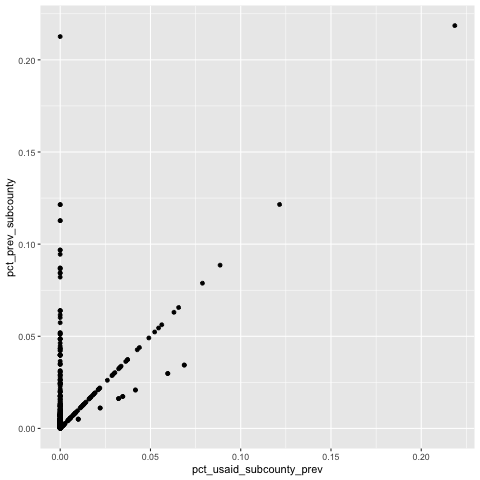

In [163]:
%%R

    ggplot(df) +
    aes(x=pct_usaid_subcounty_prev, y=pct_prev_subcounty) + 
    geom_point()

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 265 rows containing missing values or values outside the scale range
(`geom_point()`). 



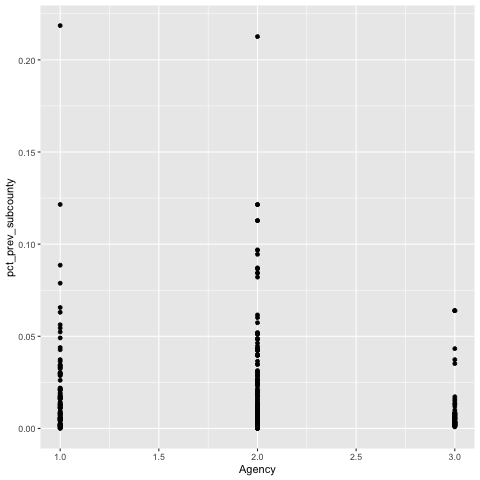

In [202]:
%%R

    ggplot(df) +
    aes(x=Agency, y=pct_prev_subcounty) + 
    geom_point()

In [164]:
df[df['usaid'] == 1]['pct_prev_subcounty'].mean()

0.021095960727569682

In [165]:
df[df['usaid'] == 0]['pct_prev_subcounty'].mean()

0.013943199383513724

In [166]:
df[df['cdc'] == 1]['pct_prev_subcounty'].mean()

0.015068700001331823

In [167]:
df[df['cdc'] == 0]['pct_prev_subcounty'].mean()

0.016048981794033048

In [168]:
df[df['dod'] == 1]['pct_prev_subcounty'].mean()

0.009539370742622757

In [169]:
df[df['dod'] == 0]['pct_prev_subcounty'].mean()

0.016373990841963684

In [170]:
df[df['usaid'] == 1]['pct_prev_subcounty'].median()

0.012706480304955527

In [171]:
df[df['usaid'] == 0]['pct_prev_subcounty'].median()

0.005035842053068215

In [172]:
df[df['cdc'] == 1]['pct_prev_subcounty'].median()

0.005035842053068215

In [173]:
df[df['cdc'] == 0]['pct_prev_subcounty'].median()

0.007537839956582041

In [174]:
df[df['dod'] == 1]['pct_prev_subcounty'].median()

0.0051748200489546235

In [175]:
df[df['dod'] == 0]['pct_prev_subcounty'].median()

0.006678668779598906

In [176]:
df[df['usaid'] == 1]['pct_PP_pos_subcounty'].mean()

0.0008081968194567024

In [177]:
df[df['usaid'] == 0]['pct_PP_pos_subcounty'].mean()

0.0010566793051425634

In [178]:
df[df['cdc'] == 1]['pct_PP_pos_subcounty'].mean()

0.0012628799199227581

In [179]:
df[df['cdc'] == 0]['pct_PP_pos_subcounty'].mean()

0.0005369919518209598

In [180]:
df[df['dod'] == 1]['pct_PP_pos_subcounty'].mean()

0.00017094794646666924

In [181]:
df[df['dod'] == 0]['pct_PP_pos_subcounty'].mean()

0.00114150762257733

In [182]:
df[df['usaid'] == 1]['pct_PP_pos_subcounty'].median()

0.00014651223439948193

In [183]:
df[df['usaid'] == 0]['pct_PP_pos_subcounty'].median()

0.0002486469908991718

In [184]:
df[df['cdc'] == 1]['pct_PP_pos_subcounty'].median()

0.0004596506506764715

In [185]:
df[df['cdc'] == 0]['pct_PP_pos_subcounty'].median()

0.000125630665943034

### From this analysis it looks like USAID funds more prevention initiatives among priority populations than CDC and DOD

# Running Linear and Logistic Regressions on the Percent Reached by Prevention per Subcounty

In [194]:
%%R -i df
model <- lm(pct_prev_subcounty ~ pct_usaid_subcounty_prev, data=df)
summary(model)


Call:
lm(formula = pct_prev_subcounty ~ pct_usaid_subcounty_prev, data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.026762 -0.009730 -0.007078 -0.001357  0.200846 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)              0.011787   0.001039   11.35   <2e-16 ***
pct_usaid_subcounty_prev 0.717836   0.059165   12.13   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02159 on 469 degrees of freedom
  (261 observations deleted due to missingness)
Multiple R-squared:  0.2389,	Adjusted R-squared:  0.2373 
F-statistic: 147.2 on 1 and 469 DF,  p-value: < 2.2e-16



In [203]:
%%R -i df
model <- lm(pct_prev_subcounty ~ usaid, data=df)
summary(model)


Call:
lm(formula = pct_prev_subcounty ~ usaid, data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.021068 -0.011832 -0.008907 -0.000180  0.198690 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.013943   0.001271  10.972   <2e-16 ***
usaid       0.007153   0.002800   2.554    0.011 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02458 on 469 degrees of freedom
  (261 observations deleted due to missingness)
Multiple R-squared:  0.01372,	Adjusted R-squared:  0.01162 
F-statistic: 6.524 on 1 and 469 DF,  p-value: 0.01096



In [204]:
%%R -i df
model <- lm(pct_prev_subcounty ~ cdc, data=df)
summary(model)


Call:
lm(formula = pct_prev_subcounty ~ cdc, data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.016021 -0.012639 -0.009470  0.001208  0.202532 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0160490  0.0019147   8.382 6.11e-16 ***
cdc         -0.0009803  0.0023832  -0.411    0.681    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02474 on 469 degrees of freedom
  (261 observations deleted due to missingness)
Multiple R-squared:  0.0003606,	Adjusted R-squared:  -0.001771 
F-statistic: 0.1692 on 1 and 469 DF,  p-value: 0.681



In [206]:
%%R -i df
model <- lm(pct_prev_subcounty ~ factor(Agency), data=df)
summary(model)


Call:
lm(formula = pct_prev_subcounty ~ factor(Agency), data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.021068 -0.012239 -0.007863  0.000596  0.197564 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.021096   0.002490   8.471  3.2e-16 ***
factor(Agency)2   -0.006027   0.002860  -2.107  0.03563 *  
factor(Agency)3   -0.011557   0.003914  -2.953  0.00331 ** 
factor(Agency)NaN -0.020028   0.012514  -1.600  0.11019    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02453 on 467 degrees of freedom
  (261 observations deleted due to missingness)
Multiple R-squared:  0.02183,	Adjusted R-squared:  0.01554 
F-statistic: 3.473 on 3 and 467 DF,  p-value: 0.01606



In [195]:
%%R -i df
logistic <- glm(usaid ~ pct_prev_subcounty, data=df, family="binomial")
summary(logistic)


Call:
glm(formula = usaid ~ pct_prev_subcounty, family = "binomial", 
    data = df)

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -1.5151     0.1364 -11.106   <2e-16 ***
pct_prev_subcounty   9.7551     4.0663   2.399   0.0164 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 479.04  on 470  degrees of freedom
Residual deviance: 473.44  on 469  degrees of freedom
  (261 observations deleted due to missingness)
AIC: 477.44

Number of Fisher Scoring iterations: 4



In [196]:
%%R

require('tidyverse')
require('DescTools')

In [197]:
%%R

PseudoR2(logistic, which='McFadden')

  McFadden 
0.01168953 


In [198]:
%%R -i df
logistic <- glm(cdc ~ pct_prev_subcounty, data=df, family="binomial")
summary(logistic)


Call:
glm(formula = cdc ~ pct_prev_subcounty, family = "binomial", 
    data = df)

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)          0.6236     0.1135   5.493 3.95e-08 ***
pct_prev_subcounty  -1.5773     3.8329  -0.412    0.681    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 612.51  on 470  degrees of freedom
Residual deviance: 612.35  on 469  degrees of freedom
  (261 observations deleted due to missingness)
AIC: 616.35

Number of Fisher Scoring iterations: 4



In [191]:
%%R

PseudoR2(logistic, which='McFadden')

    McFadden 
0.0002736828 


In [192]:
%%R -i df
logistic <- glm(dod ~ pct_prev_subcounty, data=df, family="binomial")
summary(logistic)


Call:
glm(formula = dod ~ pct_prev_subcounty, family = "binomial", 
    data = df)

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -1.5736     0.1636  -9.617   <2e-16 ***
pct_prev_subcounty -19.6996     9.5330  -2.066   0.0388 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 381.69  on 470  degrees of freedom
Residual deviance: 375.51  on 469  degrees of freedom
  (261 observations deleted due to missingness)
AIC: 379.51

Number of Fisher Scoring iterations: 5



In [193]:
%%R

PseudoR2(logistic, which='McFadden')

  McFadden 
0.01618954 


### There appears to be a statistically significant relationship between the subcounties with more people reached with preventive services and USAID funding. The same doesn't exist with CDC or DOD funding.